# Explore

Environment Setup

In [47]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import env
import explore

## Acquire

- mall_customers.customers from mysql database

In [48]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

df = get_mallcustomer_data()

## Prepare

- Create dummy vars of 'gender' column, drop the first dummy var and keep remaining. 
- Because our target is continuous, I like to have a categorical representation in addition to the original in order to expand the ways we can explore. So below, we will create a categorical variable out of spending_score, for exploration purposes. 
- Split data into train, validate, and test. 
- Scale the continuous data. 

In [49]:
def scale_my_data():
    scaler = StandardScaler()
    scaler.fit(train[['age', 'annual_income']])
    X_train_scaled = scaler.transform(train[['age', 'annual_income']])
    X_validate_scaled = scaler.transform(validate[['age', 'annual_income']])
    X_test_scaled = scaler.transform(test[['age', 'annual_income']])

    train[['age_scaled', 'income_scaled']] = X_train_scaled
    validate[['age_scaled', 'income_scaled']] = X_validate_scaled
    test[['age_scaled', 'income_scaled']] = X_test_scaled
    return train, validate, test

def prep_mall(df):
    '''
    dummy var for gender into is_male
    add 'spending_class' that cut spending score into the 4 quartiles and label the new field by q1, q2, q3, q4. 
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    df = df.drop(columns=['gender'])
    df['spending_class'] = pd.qcut(df.spending_score, q=4, labels=['q1', 'q2', 'q3', 'q4'])
    train, validate, test = explore.train_validate_test_split(df, target='spending_score', seed=123)
    train, validate, test = scale_my_data()
    return df, train, validate, test

df, train, validate, test = prep_mall(df)

In [50]:
train.head()

,age,annual_income,spending_score,is_male,spending_class,age_scaled,income_scaled
customer_id,,,,,,,
124,39,69,91,1,q4,0.04,0.33
77,45,54,53,0,q3,0.45,-0.24
172,28,87,75,1,q4,-0.72,1.02
11,67,19,14,1,q1,1.97,-1.57
36,21,33,81,0,q4,-1.20,-1.04


## Explore

Steps: 

1. Univariate Standardized Exploration
2. Bivariate Standardized Exploration 
3. Multivariate Standardized Exploration
4. Customized Q&A Exploration 

Before exploration, I will create lists of variables to loop through in visualizing and testing. 
This looks a little different than when we had a binary target variable. 

- a list of binary variables
- a list of quantitative variables
- a variable holding the name of the continuous target variable
- a variable holding the name of the categorical target variable. 


In [ ]:
binary_vars = ['is_male']
quant_vars = ['age', 'annual_income', 'spending_score']
categorical_target = 'spending_class'
continuous_target = 'spending_score'

### Univariate Exploration

Explore each individual variable on its own. This could also be done prior to splitting the data into train, validate and test. 

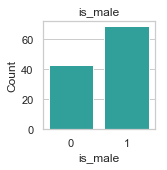

   is_male  Count              Percent
0        1     69                61.61
1        0     43                38.39
_________________________________________________________________


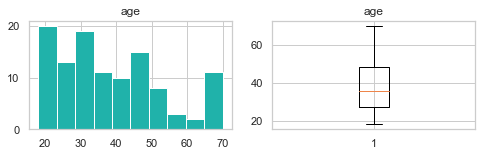

count                 112.00
mean                   38.42
std                    14.59
min                    18.00
25%                    27.00
50%                    35.50
75%                    48.00
max                    70.00
Name: age, dtype: float64


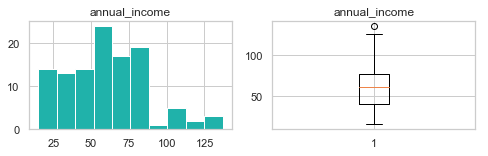

count                 112.00
mean                   60.25
std                    26.36
min                    15.00
25%                    40.00
50%                    61.50
75%                    77.25
max                   137.00
Name: annual_income, dtype: float64


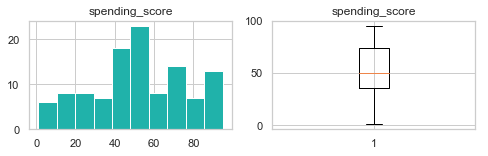

count                 112.00
mean                   52.04
std                    24.16
min                     1.00
25%                    35.75
50%                    50.00
75%                    73.25
max                    95.00
Name: spending_score, dtype: float64


In [51]:
explore.explore_univariate(train, binary_vars, quant_vars)

**Takeaways**


### Bivariate Exploration

is_male 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=1391.5, pvalue=0.5839845708203744)
                  chi2              p-value  degrees of freedom
0                 2.27                 0.52                   3

observed:
 spending_class  q1  q2  q3  q4  All
is_male                            
0               16  23  13  17   69
1                8  11  13  11   43
All             24  34  26  28  112

expected:
                      0                    1                    2  \
0                14.79                20.95                16.02   
1                 9.21                13.05                 9.98   

                     3  
0                17.25  
1                10.75  


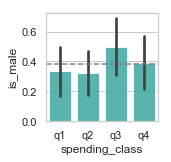


_____________________

age 
____________________



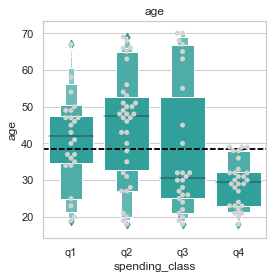

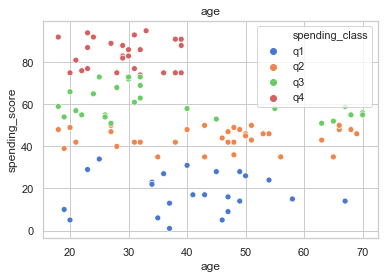

spending_class                   q1                   q2                   q3  \
count                         24.00                34.00                26.00   
mean                          40.96                44.62                37.92   
std                           11.78                14.81                18.19   
min                           19.00                18.00                18.00   
25%                           34.75                32.75                25.25   
50%                           42.00                47.50                30.50   
75%                           47.50                52.50                52.50   
max                           67.00                69.00                70.00   

spending_class                   q4  
count                         28.00  
mean                          29.18  
std                            6.32  
min                           18.00  
25%                           23.00  
50%                           29.50  
75% 

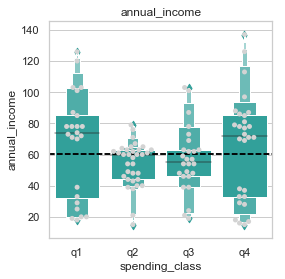

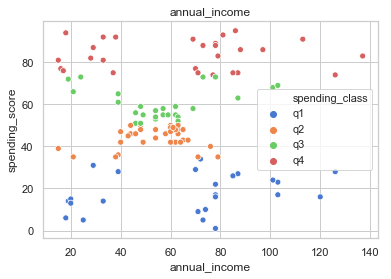

spending_class                   q1                   q2                   q3  \
count                         24.00                34.00                26.00   
mean                          66.67                54.21                56.73   
std                           33.39                14.04                20.87   
min                           18.00                15.00                19.00   
25%                           32.00                44.50                46.50   
50%                           73.50                60.00                55.50   
75%                           85.50                63.00                63.00   
max                          126.00                79.00               103.00   

spending_class                   q4  
count                         28.00  
mean                          65.36  
std                           33.79  
min                           15.00  
25%                           33.00  
50%                           72.00  
75% 

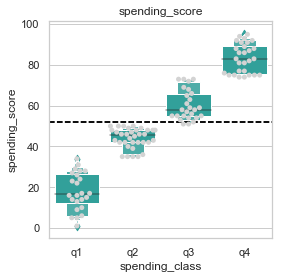

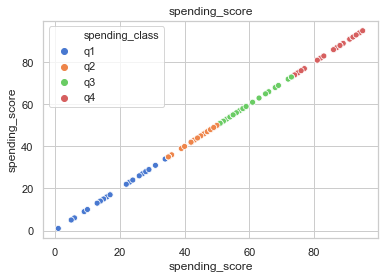

spending_class                   q1                   q2                   q3  \
count                         24.00                34.00                26.00   
mean                          17.92                44.06                60.19   
std                            9.23                 4.81                 7.34   
min                            1.00                35.00                51.00   
25%                           12.25                42.00                55.00   
50%                           16.50                45.50                58.00   
75%                           26.25                48.00                65.75   
max                           34.00                50.00                73.00   

spending_class                   q4  
count                         28.00  
mean                          83.39  
std                            7.16  
min                           74.00  
25%                           75.75  
50%                           83.00  
75% 

In [53]:
explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

**Takeaways**

### Multivariate Exploration

#### Standardized

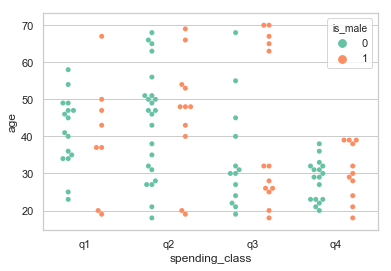

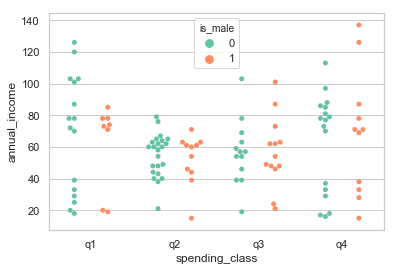

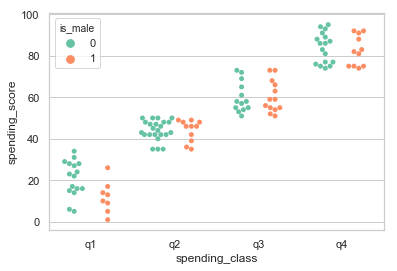

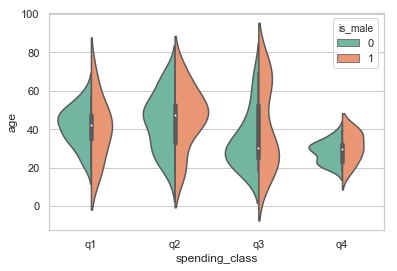

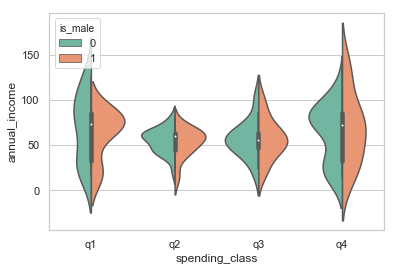

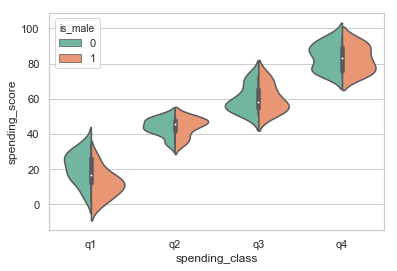

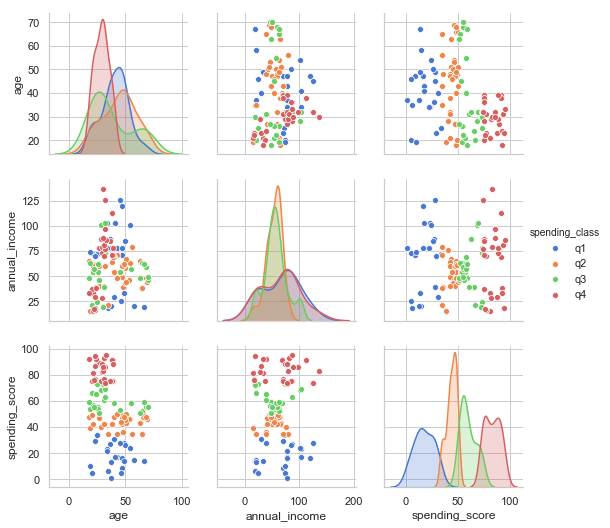

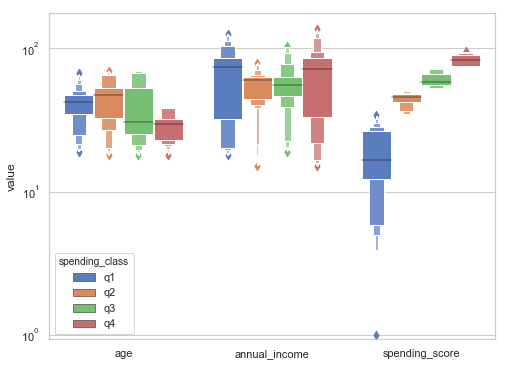

In [54]:
for var in binary_vars:
    explore.explore_multivariate(train, categorical_target, var, quant_vars)

**Takeaways**

#### Question Driven